In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings; warnings.filterwarnings(action="once")
sns.set(style='whitegrid')

In [79]:
bankCust = pd.read_csv("Bank Customer Churn Prediction.csv")

In [80]:
bankCust.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [81]:
df1 = pd.DataFrame.copy(bankCust[['credit_score', 'country', 'balance', 'active_member', 'credit_card']])

In [21]:
df1 = df1[(df1['balance']>0) & (df1['active_member']==True) & (df1['credit_card']==True)]
averageMin = (df1[df1['country'] == 'Spain'].credit_score.min() + df1[df1['country'] == 'Germany'].credit_score.min() + df1[df1['country'] == 'France'].credit_score.min()) / 3
print(averageMin)

365.0


---

####    BoxPlot Graph where data divided into 3 groups by the parameter _Country_ (Spain, France and Germany).
####    As a main parameter was used _Credit_Score_ of people which was confirmed and sorted as _Active_Users_ and _Credit_Card_Holders_ of the bank.
####    So as the result we can see difference of _CreditWorthiness_ btw this 3 groups of people.
####    From This Graph we can see that in average more Bank Customers From France has greater _CreditWorthiness_
####    And the bigger Dispercion of Bank Customers __CreditWorthiness__ from Germany

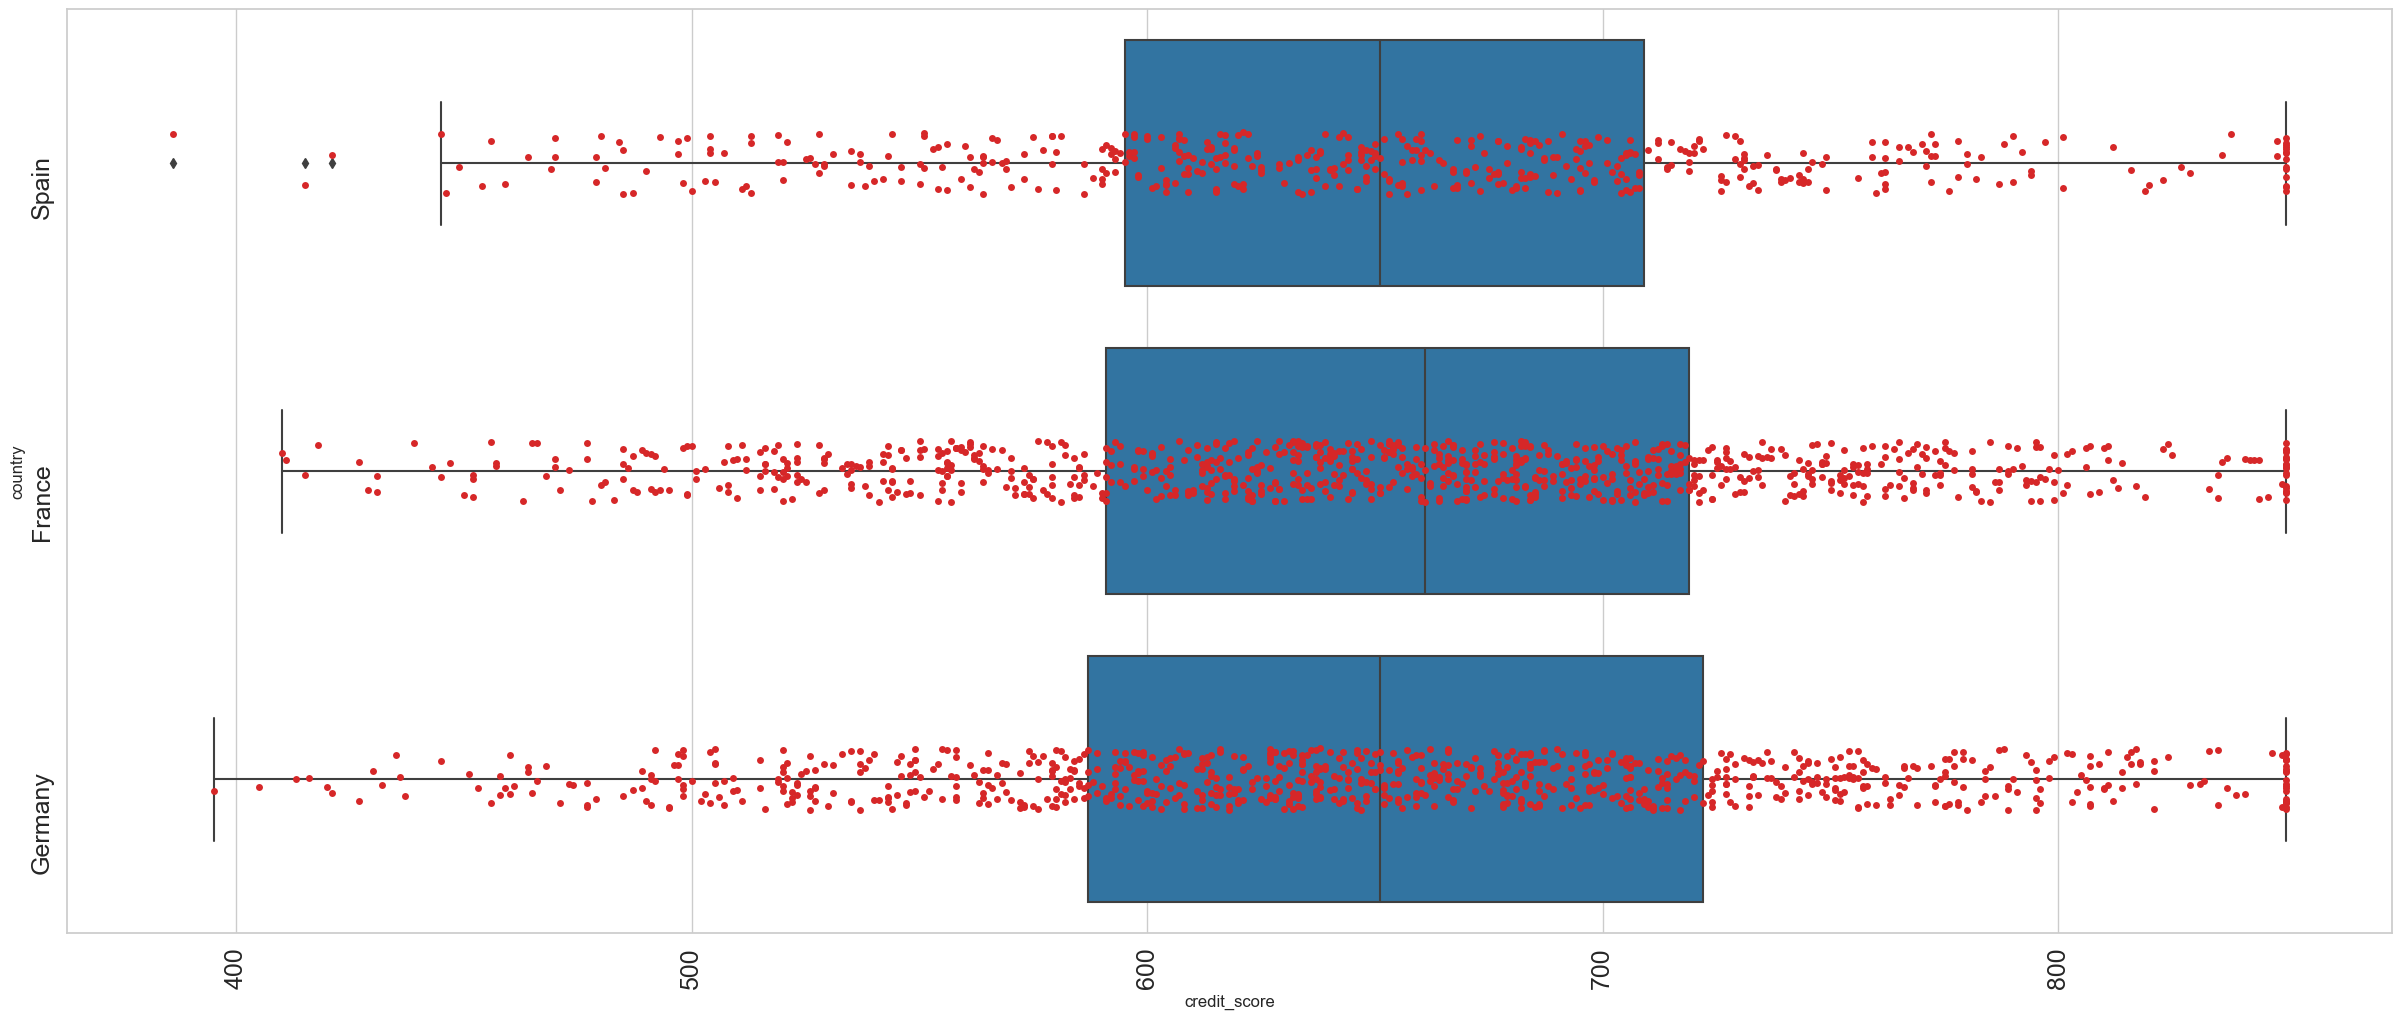

In [43]:
df1 = df1[df1['credit_score']>averageMin]
fig, ax = plt.subplots(figsize=(30, 12))
ax = sns.boxplot(y = "country", x = "credit_score" , data=df1, color='tab:blue')
ax.tick_params(rotation=90, labelsize=18)
ax = sns.stripplot(y = "country", x = "credit_score" ,data=df1, color="tab:red") 

In [44]:
df2 = pd.DataFrame.copy(bankCust[(bankCust['active_member'] == True) & (bankCust['credit_card'] == True)])
df2

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0
14,15600882,635,Spain,Female,35,7,0.00,2,1,1,65951.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,15672754,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9984,15696175,602,Germany,Male,35,7,90602.42,2,1,1,51695.41,0
9987,15588839,606,Spain,Male,30,8,180307.73,2,1,1,1914.41,0
9989,15605622,841,Spain,Male,28,4,0.00,2,1,1,179436.60,0


----

#### Here we are using data from **Age** columns and also dividin them into three groups by **Counry**
#### From this ViolinPlot is known that **BakCustomers** from **France** have greater **Dispersion** than Customers from another
#### And **BankCustomers** from **Germany** have lesser **Dispercion**

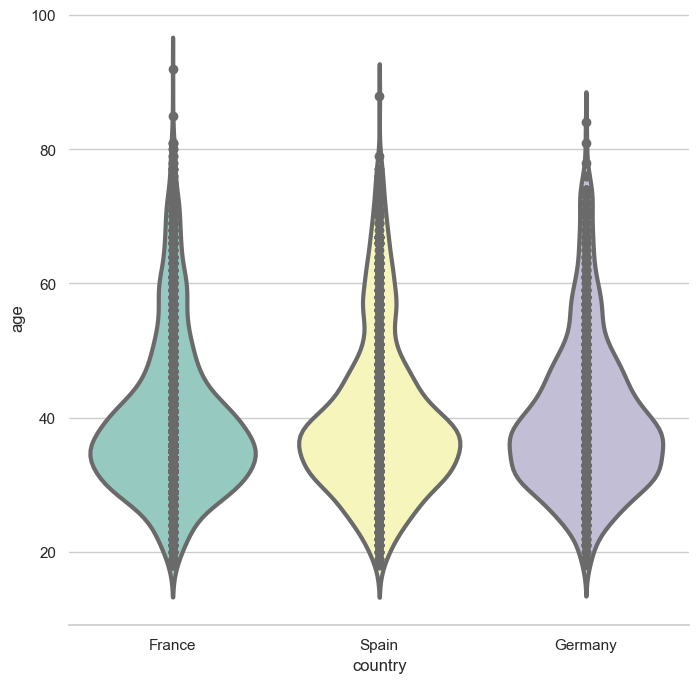

In [45]:
f, ax = plt.subplots(figsize=(8, 8))
# Show each distribution with both violins and points
sns.violinplot(x="country",y="age",data=df2, palette="Set3", inner="points", 
bw =.2, cut=2, linewidth=3)
sns.despine(left=True)

-------

#### Here is Article Variable which takes Article from wiki and then i use it as text in WordCloud

In [46]:
from newspaper import Article
article = Article('https://en.wikipedia.org/wiki/Ice_cream')
article.download()
article.parse()

-----

#### And Here is WordCloud i took most of the code from internet so i cant make clear how it works

In [67]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

In [73]:
wine_mask = np.array(Image.open("square.png"))
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [74]:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

C:\Users\raim1\AppData\Roaming\Python\Python310\site-packages\wordcloud\wordcloud.py:106: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
C:\Users\raim1\AppData\Roaming\Python\Python310\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\raim1\AppData\Roaming\Python\Python310\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\raim1\AppData\Roaming\Python\Python310\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be 

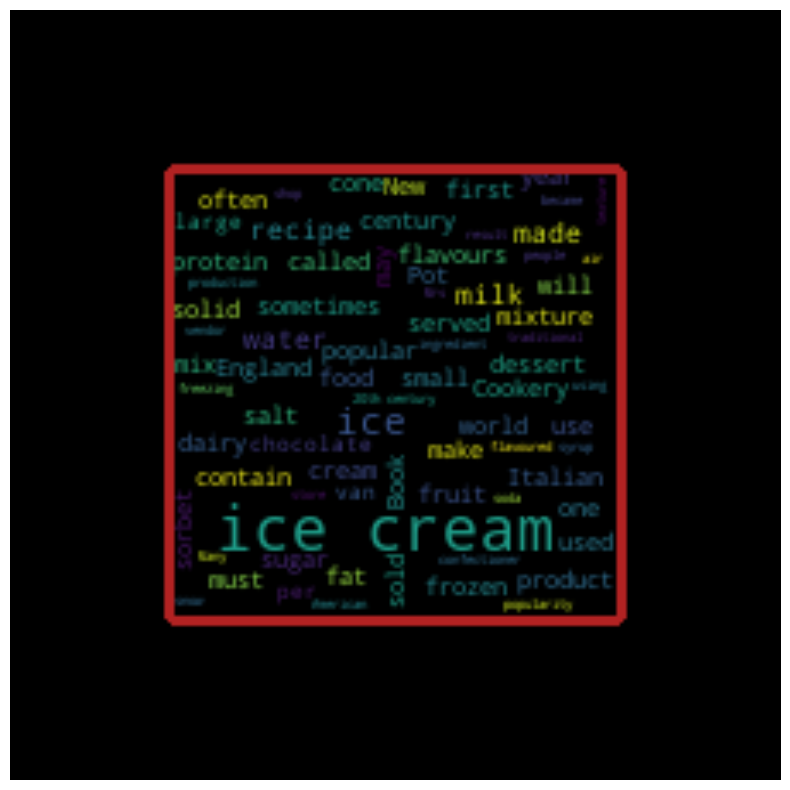

In [82]:
wc = WordCloud(background_color="black", max_words=1000, mask=transformed_wine_mask,
               stopwords=STOPWORDS, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(article.text)

# store to file
wc.to_file("square.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

as the mask i used png of square so this is all!

# Thank you GoodBye!